# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

591

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url='http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + weather_api_key + "&q="
print("Beginning Data Retriveval")
print("---------------------------")
record_count=1
set_count=1
city_data=[]
for i,city in enumerate(cities):
    if(i%500==0 and i>=500):
        record_count=0
        set_count+=1
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count+=1
    city_url=url+city
    try:
        city_weather=requests.get(city_url).json()
        city_data.append({
             "City": city,
             "Lat": city_weather["coord"]["lat"],
             "Lon": city_weather["coord"]["lon"],
             "Max Temp": city_weather["main"]["temp_max"],
             "Humidity": city_weather["main"]["humidity"],
             "Wind Speed": city_weather["wind"]["speed"],
             "Country": city_weather["sys"]["country"],
             "Date": city_weather["dt"],
             "Clouds": city_weather["clouds"]["all"]
         })
    except:
        print("City not found. Skipping..")
        pass
print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")


Beginning Data Retriveval
---------------------------
Processing Record 1 of Set 1 | sao joao da barra
Processing Record 2 of Set 1 | kavieng
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | hasaki
Processing Record 5 of Set 1 | mutsamudu
City not found. Skipping..
Processing Record 6 of Set 1 | ilulissat
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | khatanga
Processing Record 11 of Set 1 | samarai
Processing Record 12 of Set 1 | jabiru
City not found. Skipping..
Processing Record 13 of Set 1 | olavarria
Processing Record 14 of Set 1 | teya
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | cabo san lucas
Processing Record 17 of Set 1 | sao filipe
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | atuona
Processing Record 22 of Set 1

Processing Record 182 of Set 1 | tabou
Processing Record 183 of Set 1 | calatayud
Processing Record 184 of Set 1 | brae
Processing Record 185 of Set 1 | swellendam
Processing Record 186 of Set 1 | bowen
Processing Record 187 of Set 1 | coalcoman
City not found. Skipping..
Processing Record 188 of Set 1 | kruisfontein
Processing Record 189 of Set 1 | salalah
Processing Record 190 of Set 1 | kaitangata
Processing Record 191 of Set 1 | port macquarie
Processing Record 192 of Set 1 | vinh
Processing Record 193 of Set 1 | hobart
Processing Record 194 of Set 1 | port keats
Processing Record 195 of Set 1 | port elizabeth
Processing Record 196 of Set 1 | accra
Processing Record 197 of Set 1 | volsk
Processing Record 198 of Set 1 | bilibino
Processing Record 199 of Set 1 | yulara
Processing Record 200 of Set 1 | bereznehuvate
Processing Record 201 of Set 1 | sitka
Processing Record 202 of Set 1 | maceio
Processing Record 203 of Set 1 | esmeraldas
Processing Record 204 of Set 1 | mys shmidta
Cit

Processing Record 367 of Set 1 | hamilton
Processing Record 368 of Set 1 | namtsy
Processing Record 369 of Set 1 | havoysund
Processing Record 370 of Set 1 | alugan
Processing Record 371 of Set 1 | sorong
Processing Record 372 of Set 1 | kazalinsk
City not found. Skipping..
Processing Record 373 of Set 1 | boyolangu
Processing Record 374 of Set 1 | mayo
Processing Record 375 of Set 1 | trincomalee
Processing Record 376 of Set 1 | coihaique
Processing Record 377 of Set 1 | saleaula
City not found. Skipping..
Processing Record 378 of Set 1 | lashio
Processing Record 379 of Set 1 | el alto
Processing Record 380 of Set 1 | sur
Processing Record 381 of Set 1 | san andres
Processing Record 382 of Set 1 | ewa beach
Processing Record 383 of Set 1 | lolua
City not found. Skipping..
Processing Record 384 of Set 1 | serenje
Processing Record 385 of Set 1 | tazmalt
Processing Record 386 of Set 1 | bandarban
Processing Record 387 of Set 1 | nouadhibou
Processing Record 388 of Set 1 | norman wells
P

Processing Record 53 of Set 2 | zanjan
Processing Record 54 of Set 2 | troitskoye
Processing Record 55 of Set 2 | saint quentin
City not found. Skipping..
Processing Record 56 of Set 2 | college
Processing Record 57 of Set 2 | dianopolis
City not found. Skipping..
Processing Record 58 of Set 2 | matara
Processing Record 59 of Set 2 | lukow
Processing Record 60 of Set 2 | buala
Processing Record 61 of Set 2 | vostok
Processing Record 62 of Set 2 | salinopolis
Processing Record 63 of Set 2 | kloulklubed
Processing Record 64 of Set 2 | kapit
Processing Record 65 of Set 2 | visnes
Processing Record 66 of Set 2 | touros
Processing Record 67 of Set 2 | viedma
Processing Record 68 of Set 2 | malanje
Processing Record 69 of Set 2 | trier
Processing Record 70 of Set 2 | ballina
Processing Record 71 of Set 2 | misratah
Processing Record 72 of Set 2 | duluth
Processing Record 73 of Set 2 | vilyuysk
Processing Record 74 of Set 2 | boyuibe
Processing Record 75 of Set 2 | labutta
City not found. Ski

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_data = pd.DataFrame(city_data)
weather_data.head()

City    Lat     Lon  Max Temp  Humidity  Wind Speed Country  \
0  sao joao da barra -21.64  -41.05     80.60        65        9.17      BR   
1            kavieng  -2.57  150.80     83.16        74        5.46      PG   
2            rikitea -23.12 -134.97     78.87        79       13.20      PF   
3             hasaki  35.73  140.83     39.20        64       10.29      JP   
4          ilulissat  69.22  -51.10      8.60        60        1.12      GL   

         Date  Clouds  
0  1580076765      35  
1  1580076765       0  
2  1580076658       0  
3  1580076766      75  
4  1580076766      91

In [7]:
weather_data.to_csv("weather_data.csv", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

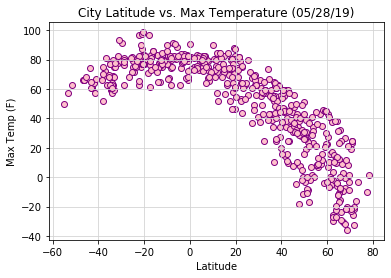

In [54]:
plt.scatter(weather_data["Lat"],weather_data["Max Temp"],edgecolors="purple",facecolors="pink")
plt.title("City Latitude vs. Max Temperature (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid (b=True, which="major", axis="both", linestyle="-",color="lightgrey")
plt.savefig("Lat_v_Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

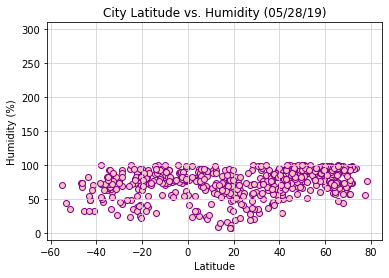

In [55]:
plt.scatter(weather_data["Lat"],weather_data["Humidity"],edgecolors="purple",facecolors="pink")
plt.title("City Latitude vs. Humidity (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(-10,310)
plt.grid (b=True, which="major", axis="both", linestyle="-",color="lightgrey")
plt.savefig("Lat_v_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

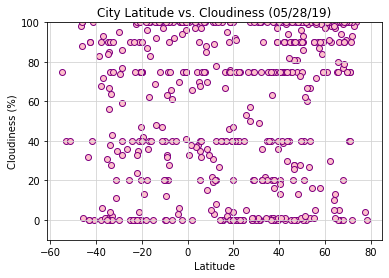

In [56]:
plt.scatter(weather_data["Lat"],weather_data["Clouds"],edgecolors="purple",facecolors="pink")
plt.title("City Latitude vs. Cloudiness (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-10,100)
plt.grid (b=True, which="major", axis="both", linestyle="-",color="lightgrey")
plt.savefig("Lat_v_Clouds.png")
plt.show()

#### Latitude vs. Wind Speed Plot

In [57]:
plt.scatter(weather_data["Lat"],weather_data["Wind Speed"],edgecolors="purple",facecolors="pink")
plt.title("City Latitude vs. Windspeed(mph) (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(0,40)
plt.grid (b=True, which="major", axis="both", linestyle="-",color="lightgrey")
plt.savefig("Lat_v_Wind.png")
plt.show()

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [15]:
# Create Northern and Southern Hemisphere DataFrames
north= weather_data[weather_data['Lat']>=0]
south= weather_data[weather_data['Lon']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

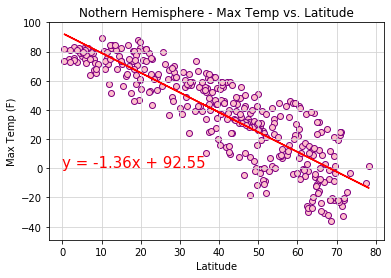

In [58]:
plt.scatter(north["Lat"],north["Max Temp"],edgecolors="purple",facecolors="pink")
plt.title("Nothern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.ylim(-49,100)
plt.grid (b=True, which="major", axis="both", linestyle="-",color="lightgrey")
(slope, intercept, rvalue, pvalue, stderr) = linregress(north["Lat"], north["Max Temp"])
regress_values = north["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north["Lat"],regress_values,"r-")
plt.annotate(line_eq,(0,1),fontsize=15,color="red")
plt.savefig("North_Lat_v_Temp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [65]:
plt.scatter(south["Lat"],south["Max Temp"],edgecolors="purple",facecolors="pink")
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.ylim(-49,200)
plt.grid (b=True, which="major", axis="both", linestyle="-",color="lightgrey")
(slope, intercept, rvalue, pvalue, stderr) = linregress(south["Lat"], south["Max Temp"])
regress_values = south["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,1),fontsize=15,color="red")
plt.savefig("South_Lat_v_Temp.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

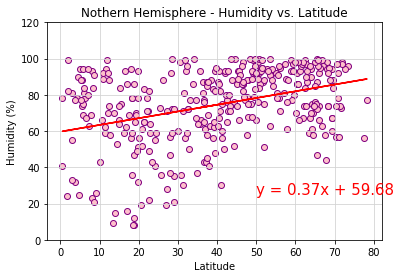

In [59]:
plt.scatter(north["Lat"],north["Humidity"],edgecolors="purple",facecolors="pink")
plt.title("Nothern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0,120)
plt.grid (b=True, which="major", axis="both", linestyle="-",color="lightgrey")
(slope, intercept, rvalue, pvalue, stderr) = linregress(north["Lat"], north["Humidity"])
regress_values = north["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north["Lat"],regress_values,"r-")
plt.annotate(line_eq,(50,25),fontsize=15,color="red")
plt.savefig("North_Lat_v_Humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

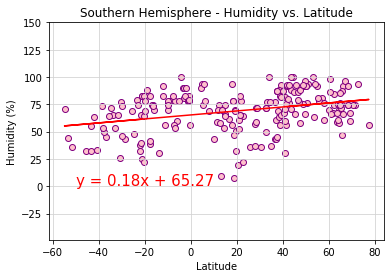

In [60]:
plt.scatter(south["Lat"],south["Humidity"],edgecolors="purple",facecolors="pink")
plt.title("Southern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(-49,150)
plt.grid (b=True, which="major", axis="both", linestyle="-",color="lightgrey")
(slope, intercept, rvalue, pvalue, stderr) = linregress(south["Lat"], south["Humidity"])
regress_values = south["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,1),fontsize=15,color="red")
plt.savefig("South_Lat_v_Humidty.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

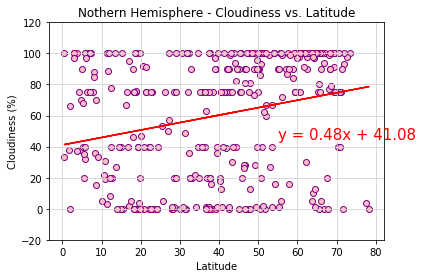

In [61]:
plt.scatter(north["Lat"],north["Clouds"],edgecolors="purple",facecolors="pink")
plt.title("Nothern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-20,120)
plt.grid (b=True, which="major", axis="both", linestyle="-",color="lightgrey")
(slope, intercept, rvalue, pvalue, stderr) = linregress(north["Lat"], north["Clouds"])
regress_values = north["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north["Lat"],regress_values,"r-")
plt.annotate(line_eq,(55,45),fontsize=15,color="red")
plt.savefig("North_Lat_v_Cloud.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

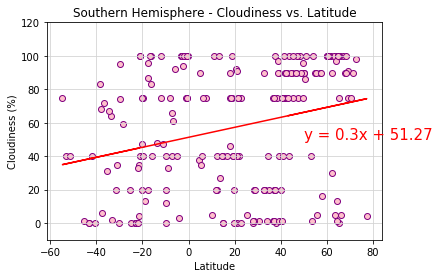

In [62]:
plt.scatter(south["Lat"],south["Clouds"],edgecolors="purple",facecolors="pink")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-10,120)
plt.grid (b=True, which="major", axis="both", linestyle="-",color="lightgrey")
(slope, intercept, rvalue, pvalue, stderr) = linregress(south["Lat"], south["Clouds"])
regress_values = south["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south["Lat"],regress_values,"r-")
plt.annotate(line_eq,(50,50),fontsize=15,color="red")
plt.savefig("South_Lat_v_Cloud.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

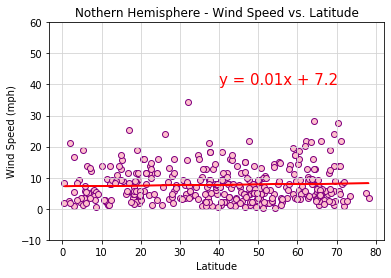

In [63]:
plt.scatter(north["Lat"],north["Wind Speed"],edgecolors="purple",facecolors="pink")
plt.title("Nothern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-10,60)
plt.grid (b=True, which="major", axis="both", linestyle="-",color="lightgrey")
(slope, intercept, rvalue, pvalue, stderr) = linregress(north["Lat"], north["Wind Speed"])
regress_values = north["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north["Lat"],regress_values,"r-")
plt.annotate(line_eq,(40,40),fontsize=15,color="red")
plt.savefig("North_Lat_v_Wind.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

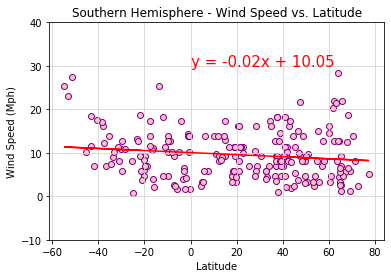

In [64]:
plt.scatter(south["Lat"],south["Wind Speed"],edgecolors="purple",facecolors="pink")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (Mph)")
plt.ylim(-10,40)
plt.grid (b=True, which="major", axis="both", linestyle="-",color="lightgrey")
(slope, intercept, rvalue, pvalue, stderr) = linregress(south["Lat"], south["Wind Speed"])
regress_values = south["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south["Lat"],regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.savefig("South_Lat_v_Wind.png")
plt.show()